## Exploratory Data Analysis of the US Accidents Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)

## Thu thập dữ liệu:
- Dữ liệu thu thập được là về các vụ tai nạn tại Mỹ. Dữ liệu được download ở link sau: https://www.kaggle.com/sobhanmoosavi/us-accidents
- Theo như điều khoản của chủ sở hữu thì data được chia sẻ rộng rãi và mục đích học tập, nghiên cứu không vi phạm điều khoản cảu chủ sỡ hữu đưa ra.
- Trích lời tác giả về cách thu thập dữ liệu: Đây là tập dữ liệu về tai nạn xe hơi trên toàn quốc, bao gồm 49 tiểu bang của Hoa Kỳ . Dữ liệu tai nạn được thu thập từ tháng 2 năm 2016 đến tháng 12 năm 2020 , sử dụng nhiều API cung cấp dữ liệu sự cố (hoặc sự kiện) giao thông trực tuyến. Các API này truyền phát dữ liệu giao thông được thu thập bởi nhiều thực thể, chẳng hạn như bộ giao thông vận tải Hoa Kỳ và tiểu bang, cơ quan thực thi pháp luật, camera giao thông và cảm biến giao thông trong mạng lưới đường bộ. Hiện tại, có khoảng 1,5 triệu hồ sơ tai nạn trong bộ dữ liệu này

In [22]:
accidents_df = pd.read_csv('US_Accidents_Dec20_updated.csv')
accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


## Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột? (0.25đ)

In [4]:
num_rows,num_cols=accidents_df.shape
print('The Dataset includes: {} rows and {} columns'.format(num_rows,num_cols))

The Dataset includes: 1516064 rows and 47 columns


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng thể hiện các thông tin về các vụ tai nạn xe hơi thuộc 49 tiểu bang của Hoa Kỳ. Có vẻ không có dòng nào lạc loài.


## Dữ liệu có các dòng bị lặp không? (0.5đ)

In [5]:
have_duplicated_rows=accidents_df.duplicated().any()
print(have_duplicated_rows)

False


Dữ liệu của các dòng không bị lặp.

## Mỗi cột có ý nghĩa gì?

•  ID: Số nhận dạng (duy nhất) của các hồ sơ vụ tai nạn.

•  Severity: Mức độ nghiêm trọng của vụ tai nạn tác động đến giao thông, được tính theo 4 mức từ 1 đến 4 (1 là tác động ít nhất đến giao thông gây ra thời gian trễ ngắn, 4 là tác động nhiều nhất đến giao thông gây ra thời gian trễ dài).

•  Start_Time: Thời gian xảy ra vụ tai nạn (tính theo múi giờ địa phương)

•  End_Time: Thời gian vụ tai nạn kết thúc (kết thúc ở đây có nghĩa là vụ tai nạn không còn làm ảnh hưởng đến giao thông)

•  Start_Lat: Vĩ độ vụ tai nạn trong định vị GPS của điểm bắt đầu.

•  Start_Lng: Kinh độ vụ tai nạn trong định vị GPS của điểm bắt đầu.

•  End_Lat: Vĩ độ vụ tai nạn trong định vị GPS của điểm kết thúc.

•  End_Lng: Kinh độ vụ tai nạn trong định vị GPS của điểm kết thúc.

•  Distance(mi): Chiều dài của đoạn đường bị ảnh hưởng bởi vụ tai tạn.

•  Description: Mô tả vụ tai nạn.

•  Number: Số của con đường trong bản định danh.

•  Street: Tên của con đường trong bản đinh danh.

•  Side: Vụ tai nạn xảy ra ở phía (phải/trái) của con đường.

•  City: Tên thành phố xảy ra vụ tai nạn.

•  County: Tên quận xảy ra vụ tai nạn.

•  State: Trạng thái trong bản ghi địa chỉ.

•  Zipcode: Mã zip trong bản ghi địa chỉ.

•  Country: Tên quốc gia có vụ tai nạn.

•  Timezone: Múi giờ của nơi xảy ra vụ tại nạn.

•  Airport_Code: Mã của trạm thời tiết tại sân bay gần nhất với vị trí xảy ra tai nạn.

•  Weather_Timestamp: Dấu thời gian của bản ghi thời tiết theo múi giờ địa phương.

•  Temperature (F): Nhiệt độ lúc xảy ra tai nạn.

•  Wind_Chill (F): Gió lạnh lúc xảy ra tai nạn.

•  Humidity (%): Độ ẩm lúc xảy ra tai nạn.

•  Pressure (inches): Áp suất không khí lúc xảy ra tai nạn.

•  Visibility (miles): Tầm nhìn lúc xảy ra tai nạn.

•  Wind_Direction: Hướng gió lúc xảy ra tai nạn.

•  Wind_Speed (mph): Tốc độ gió lúc xảy ra tai nạn(miles/hour).

•  Precipitation (inches): Lượng mưa lúc xảy ra tai nạn.

•  Weather_Condition: Trạng thái thời tiết lúc xảy ra tai nạn (mưa, bão, tuyết rơi,…)

•  Amenity: Sự tiện nghi của một khu vực ở gần vụ tai nạn.

•  Bump: Có biển báo của gờ giảm tốc hoặc các gờ ở gần vị trí xảy ra vụ tai nạn hay không.

•  Crossing: Có biển báo người qua đường của các đường ở gần vụ tai nạn hay không.

•  Give_Way: Có biển báo nhường đường ở vị trí gần vụ tai nạn hay không.

•  Junction: Có biển báo đường giao nhau ở vị trí gần vụ tai nạn hay không.

•  No_Exit: Có biển báo cấm đi vào ở gần vụ tai nạn hay không.

•  Railway: Có biển báo đường sắt ở gần vụ tai nạn hay không.

•  Roundabout: Có sự hiện diện của bùng binh ở gần vị trí vụ tai nạn hay không.

•  Station: Có sự hiện diện của trạm ở gần vị trí vụ tai nạn hay không.

•  Stop: Có biển báo dừng ở gần vị trí vụ tai nạn hay không.

•  Traffic_Calming: Có sự hiện diện của các thiết kế vật lý trên đường nhằm hạn chế tốc độ ở gần vị trí vụ tai nạn hay không.

•  Traffic_Signal: Có sự hiện diện của đèn giao thông ở gần vị trí vụ tai nạn hay không.

•  Turning_Loop: Có sự hiện diện của khúc quoanh ở gần vị trí vụ tai nạn hay không.

•  Sunrise_Sunset: Hiển thị khoảng thời gian dựa theo mặt trời mọc hay lặn.

•  Civil_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn dân sự.

•  Nautical_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn hàng hải.

•  Astronomical_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn thiên văn.

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
col_dtypes = accidents_df.dtypes
print(col_dtypes)

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [7]:
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

In [8]:
objects_key=(accidents_df.loc[:, accidents_df.dtypes == object]).keys()
print("numer of object columns:",len(objects_key))
for key in objects_key:
    print("types of ",key," is ",open_object_dtype(accidents_df[key]))

numer of object columns: 20
types of  ID  is  {<class 'str'>}
types of  Start_Time  is  {<class 'str'>}
types of  End_Time  is  {<class 'str'>}
types of  Description  is  {<class 'str'>}
types of  Street  is  {<class 'str'>}
types of  Side  is  {<class 'str'>}
types of  City  is  {<class 'str'>, <class 'float'>}
types of  County  is  {<class 'str'>}
types of  State  is  {<class 'str'>}
types of  Zipcode  is  {<class 'str'>, <class 'float'>}
types of  Country  is  {<class 'str'>}
types of  Timezone  is  {<class 'str'>, <class 'float'>}
types of  Airport_Code  is  {<class 'str'>, <class 'float'>}
types of  Weather_Timestamp  is  {<class 'str'>, <class 'float'>}
types of  Wind_Direction  is  {<class 'str'>, <class 'float'>}
types of  Weather_Condition  is  {<class 'str'>, <class 'float'>}
types of  Sunrise_Sunset  is  {<class 'str'>, <class 'float'>}
types of  Civil_Twilight  is  {<class 'str'>, <class 'float'>}
types of  Nautical_Twilight  is  {<class 'str'>, <class 'float'>}
types of  A

## Tiền xử lý

### Chuyển dtype của cột "Date" sang datetime

In [9]:
datetime_cols=['Start_Time','End_Time','Weather_Timestamp']
for key in datetime_cols:
    accidents_df[key]= pd.to_datetime(accidents_df[key])

In [10]:
print(accidents_df)

                ID  Severity          Start_Time            End_Time  \
0        A-2716600         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1        A-2716601         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2        A-2716602         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3        A-2716603         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
4        A-2716604         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
...            ...       ...                 ...                 ...   
1516059  A-4239402         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
1516060  A-4239403         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
1516061  A-4239404         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
1516062  A-4239405         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
1516063  A-4239406         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
0         40.10891  -83.09286  40.11206  -83.03187         3.230   

## Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [11]:
numeric_cols=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)']

all_num_cols=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)','Start_Time','End_Time','Weather_Timestamp']

nume_col_profiles_df=pd.DataFrame(index=['missing_ratio','min','max'],
                                  columns=all_num_cols)

nume_col_profiles_df.loc['missing_ratio',numeric_cols]=np.float64(accidents_df[numeric_cols].isna().mean()*100)

nume_col_profiles_df.loc['min',numeric_cols]=np.float64(accidents_df[numeric_cols].min())

nume_col_profiles_df.loc['max',numeric_cols]=np.float64(accidents_df[numeric_cols].max())

nume_col_profiles_df=nume_col_profiles_df.astype(np.float64)




nume_col_profiles_df.loc['missing_ratio',datetime_cols]=accidents_df[datetime_cols].isna().mean()*100

nume_col_profiles_df.loc['min',datetime_cols]=accidents_df[datetime_cols].min()

nume_col_profiles_df.loc['max',datetime_cols]=accidents_df[datetime_cols].max()



## Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào ?

In [12]:
cate_cols=list(set(accidents_df.keys())-set(all_num_cols))

index=['missing_ratio', 'num_diff_vals', 'diff_vals']
cate_col_profiles_df=pd.DataFrame(
     index=index,
     columns=cate_cols)
cate_col_profiles_df.loc['missing_ratio',:]=accidents_df[cate_cols].isna().mean()*100

cate_col_profiles_df.loc['num_diff_vals',:]=accidents_df[cate_cols].nunique()
print(cate_col_profiles_df)

              Side Junction   Zipcode State Turning_Loop       ID  \
missing_ratio  0.0      0.0  0.061673   0.0          0.0      0.0   
num_diff_vals    2        2    177196    49            1  1516064   
diff_vals      NaN      NaN       NaN   NaN          NaN      NaN   

              Airport_Code Roundabout Country Give_Way  ...  Timezone Amenity  \
missing_ratio     0.280199        0.0     0.0      0.0  ...  0.151841     0.0   
num_diff_vals         1985          2       1        2  ...         4       2   
diff_vals              NaN        NaN     NaN      NaN  ...       NaN     NaN   

              Street Traffic_Signal County      City Sunrise_Sunset  \
missing_ratio    0.0            0.0    0.0  0.005475       0.005475   
num_diff_vals  93048              2   1671     10657              2   
diff_vals        NaN            NaN    NaN       NaN            NaN   

              Civil_Twilight Astronomical_Twilight Weather_Condition  
missing_ratio       0.005475              

## Đặt ra các câu hỏi có ý nghĩa? Giải thích về lợi ích của việc trả lời các câu hỏi này.
Câu 1: Trong các năm từ 2018 đến 2020, những thành phố nào có nhiều vụ tai nạn xảy ra nhất ? Làm sao để có thể hạn chế tối đa số vụ tai nạn trong các thành phố này?
 - Trả lời được câu hỏi này, ta sẽ tìm ra giải pháp để giảm thiểu số vụ tai nạn xảy ra trong các thành phố nêu trên.

Câu 2: Ánh sáng có tác động đến tầm nhìn đối với các công trình giao thông ở các quận xảy ra nhiều tai nạn hay không?
 - Sau khi trả lời câu hỏi này, ta sẽ biết được liệu ban ngày và ban đêm có ảnh hưởng lớn đến tầm nhìn của lái xe hay không và việc đặt các công trình giao thông trên đã nằm ở nơi dễ nhìn thấy hay chưa. Từ đó, đưa ra các biện pháp cải thiện tầm nhìn nhằm giảm thiểu số vụ tai nạn xảy ra do không có đủ tầm nhìn.


In [18]:
#Câu 2: Ánh sáng có ảnh hưởng đến việc nhìn thấy các biển báo ở các nơi xảy ra nhiều tai nạn hay không?

#Lọc ra các cột cần dùng
sign = ['County','Visibility(mi)','Sunrise_Sunset','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
        'Station','Stop','Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
df = accidents_df[sign]
df_county = accidents_df[['County','Bump']]

#Tìm top 5 thành phố có số vụ tai nạn nhiều nhất 
data = pd.DataFrame(df_county.groupby(["County"]).count())
data.columns = ['Top county']
data = data.sort_values(['Top county'], ascending=False)
data = data.reset_index()
top5 = data['County'].loc[0:4]
top5 = list(top5)

#Lọc ra các vụ tai nạn có sự xuất hiện của các công trình giao thông như biển báo, bùng binh, đén giao thông,... tại 5 khu vực nóng
C_area = df[(df['Bump']==True) | (df['Crossing']==True) | (df['Give_Way']==True) | (df['Junction']==True) | (df['No_Exit']==True) | 
        (df['Railway']==True) | (df['Roundabout']==True) | (df['Station']==True) | (df['Stop']==True) | 
        (df['Traffic_Calming']==True) | (df['Traffic_Signal']==True) | (df['Turning_Loop']==True) ]
C_area = C_area.loc[C_area['County'].isin(top5)]
C_area = C_area.reset_index(drop = True)

#Đầu tiên hãy tìm hiểu về tỉ lệ các vụ tai nạn xảy ra vào ban ngày và ban đêm xem có điều gì bất thường không
Total = len(C_area['County'])
Area = C_area[['Sunrise_Sunset','County']]
Area = Area.groupby('Sunrise_Sunset').count()
Day = Area['County'][0]
Night = Area['County'][1]
#Tính tỉ lệ và lưu vào 2 biến Acc_At_Night, Acc_At_Day
Acc_Night = round((Night / Total),3)
Acc_Day = round((Day / Total),3)
print("Ti le tai nan vao ban dem: ", Acc_Night)
print("Ti le tai nan vao ban ngay: ", Acc_Day)

Ti le tai nan vao ban dem:  0.378
Ti le tai nan vao ban ngay:  0.622


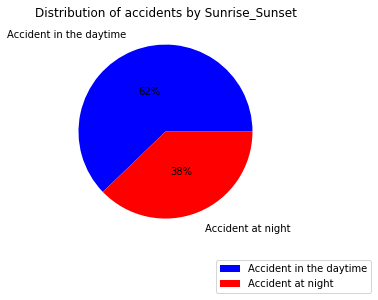

In [19]:
#Biểu đồ tỉ lệ tai nạn vào ban ngày và ban đêm
Arr = [Acc_Day, Acc_Night]
label = ["Accident in the daytime","Accident at night"]
mycolors = ["blue","red"]
plt.pie(Arr,labels = label, colors = mycolors ,autopct='%1.0f%%', pctdistance=0.5, labeldistance= 1.2)
plt.title("Distribution of accidents by Sunrise_Sunset")
plt.legend(bbox_to_anchor=(1,0), loc="right", bbox_transform=plt.gcf().transFigure)

## Nhận xét:
    + Tỉ lệ các vụ tai nạn xảy ra vào ban ngày cao hơn gần như là gấp đôi so với tỉ lệ các vụ tai nạn xảy ra vào ban đêm. Điều này không nói lên ánh sáng có ảnh hưởng hay không bởi ta đều biết ban ngày lưu lượng phương tiện nhiều hơn nên dễ xảy ra tai nạn hơn.
    + Vào ban ngày thì ánh sáng sẽ nhiều hơn và tầm nhìn sẽ tốt hơn ban đêm rất nhiều khi ban đêm ta phải phụ thuộc vào hệ thống đèn chiếu sáng của phương tiện cũng như là hệ thống đèn công cộng.
    + Để có thể phân tích về sự ảnh hường của ánh sáng, chúng ta sẽ cùng tìm hiểu về tầm nhìn của người gặp tai nạn trước khi vụ tai nạn xảy ra.

Text(0.5, 1.0, 'Visibility of accidents at Night')

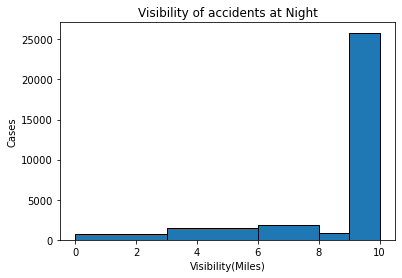

In [20]:
Visibility = C_area[['Sunrise_Sunset','Visibility(mi)']]
Night = Visibility.loc[Visibility['Sunrise_Sunset'] == 'Night']
hist1 = plt.hist(Night['Visibility(mi)'], [0,3,6,8,9,10], edgecolor = 'black')
plt.xlabel("Visibility(Miles)")
plt.ylabel("Cases")
plt.title("Visibility of accidents at Night")

Text(0.5, 1.0, 'Visibility of accidents in the Daytime')

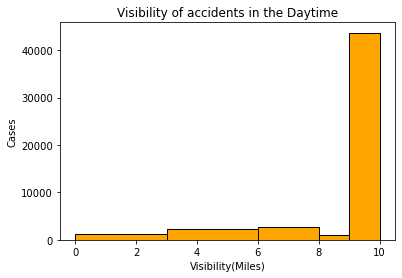

In [21]:
Day = Visibility.loc[Visibility['Sunrise_Sunset'] == 'Day']
hist2 = plt.hist(Day['Visibility(mi)'], [0,3,6,8,9,10], color = "orange", edgecolor = 'black')
plt.xlabel("Visibility(Miles)")
plt.ylabel("Cases")
plt.title("Visibility of accidents in the Daytime")

## Nhận xét:
   - Như vậy nhận định về việc hệ thống chiếu sáng của phương tiện và công cộng Không làm ảnh hưởng nhiều lắm đến các vụ tai nạn như ta đã suy đoán.
   - Dựa vào biểu đồ ta có thể thấy tầm nhìn bất kể ban ngày hay ban đêm đều ở mức ở rất cao. Điều này nói lên hệ thống chiếu sáng vẫn hoạt động khá tốt và việc nhìn thấy các công trình giao thông có thể nói là ở mức khá tốt.
   - Một số vụ tai nạn xảy ra do tầm nhìn kém có thể là do:
            + Ở một số điểm hệ thống đèn gặp trục trặc bất ngờ nên không thể xử lý kịp.
            + Người lái xe ở trong tình trạng không tỉnh táo.
            + Thị lực có thể gặp vẫn đề như cận thị.
            + Thời tiết làm ảnh hưởng đến tầm nhìn.
   - Với mức tầm nhìn gần như là tốt nhất từ 9-10 thì các vụ tai nạn lại xảy ra nhiều nhất, điều này có thể là do:
            + Lỗi bất cẩn, mất tập trung khi lái xe.
            + Người lái xe sử dụng chất kích thích, không làm chủ được bản thân.
            + Thời tiết tác động đến khả năng làm chủ phương tiện.
            + Phương tiện hư hỏng bất ngờ.
            
      
            
            
   